### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Read - Display Image

In [2]:
# Read the image
image = cv2.imread('./images/car.jpg')

# Print the type of the image
# The dimensions (height, width, color)
# We'll nedd the dimensions later
print('This image is of type:', type(image), 'with dimentions:', image.shape)

This image is of type: <class 'numpy.ndarray'> with dimentions: (450, 660, 3)


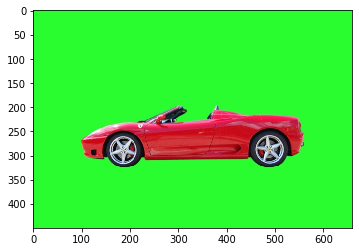

In [3]:
# Make a copy of the image
image_copy = np.copy(image)

# Change the color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

## Define Color Threshold

In [4]:
# Isolate the Green Background
# Try it by yourselves. Change the values to getyour best result!
lower_green = np.array([0, 200, 0])
upper_green = np.array([250, 255, 250])

## Creat the Mask

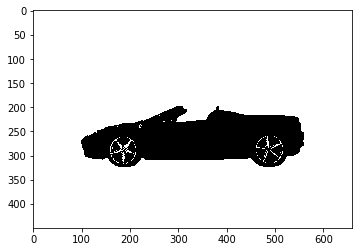

In [5]:
# Define the Masked Area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Visualize the Mask on the imgae
plt.imshow(mask, cmap = 'gray')

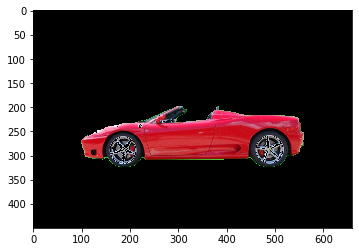

In [6]:
# Mask the Image to let your object come and show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

# Dispaly the Image
plt.imshow(masked_image)

## Mask and Add a Background Image

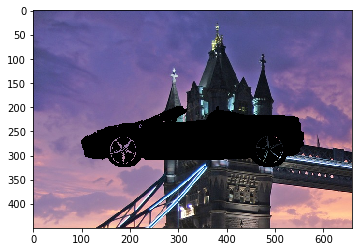

In [7]:
# Load the Image Background
background_image = cv2.imread('./images/london.jpg')

# Convert it from BGR to RGB
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the the dimensions we got
crop_background = background_image[0:450, 0:660]

# Mask the Cropped Background
# That's how the object's area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the Background
plt.imshow(crop_background)

## Let's move it

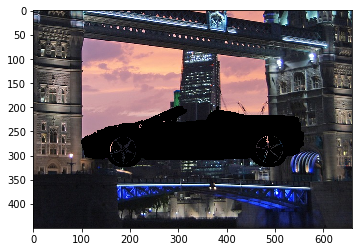

In [8]:
# x, y, h, w
x = 390
y = 300
h = 450
w = 660

# Convert it from BGR to RGB
background_image = cv2.imread('./images/london.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the the dimensions we got
crop_background = background_image[y:y+h, x:x+w]

# Mask the Cropped Background
# That's how the object's area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the Background
plt.imshow(crop_background)

# Add them together and get the Final Image

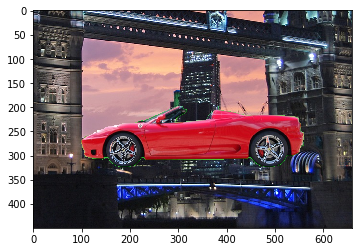

In [9]:
complete_image = masked_image + crop_background

plt.imshow(complete_image)